In [1]:
from pathlib import Path
from typing import Optional
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from difPy.dif import dup_image_search

In [3]:
directory = Path("demo_images")

In [8]:
dup_image_search(directory, move=True)

Found 1 image with one or more duplicate/similar images in 0.1125 seconds.
Moving duplicates to tmp folder in demo_images!


{PosixPath('demo_images/Git-branching_workflow.png'): [PosixPath('demo_images/Git-branching_workflow_2_rotate.png')]}

In [7]:
folder_files = [filename for filename in directory.rglob('*') if filename.is_file()]

In [8]:
folder_files

[PosixPath('demo_images/Git-branching_workflow_2_rotate.png'),
 PosixPath('demo_images/docker_environment_build_args_overview.png'),
 PosixPath('demo_images/Git-branching_workflow.png'),
 PosixPath('demo_images/Git-branching_workflow_2.png')]

In [10]:
px_size = 50
getrotate = True
img_filenames = []
img_matrix_rotdict = {
            "normal": [],
            "90": [],
            "180": [],
            "270": []
        }
for filename in folder_files:
    # check if the file is an image
    with Image.open(filename) as im:
        im = im.resize((px_size, px_size))
        im = im.convert("RGB")
        img_matrix_rotdict["normal"].append(np.asarray(im).flatten())
        img_filenames.append(filename)
        if getrotate:
            img_matrix_rotdict["90"].append(np.asarray(im.transpose(Image.ROTATE_90)).flatten())
            img_matrix_rotdict["180"].append(np.asarray(im.transpose(Image.ROTATE_180)).flatten())
            img_matrix_rotdict["270"].append(np.asarray(im.transpose(Image.ROTATE_270)).flatten())

In [12]:
img_matrix_rotdict["90"][2]

array([252, 252, 252, ..., 243, 243, 243], dtype=uint8)

In [72]:
matrix = dict()
matrix["normal"] = np.asarray(img_matrix_rotdict["normal"], dtype=float)

In [77]:
matrix["normal"]

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 245., 245., 245.]])

In [54]:
new_matrix = np.asarray(imgs_matrix + imgs_matrix)
new_matrix = new_matrix.astype(float)

In [55]:
new_matrix.shape

(4, 30000)

In [78]:
tmp = np.expand_dims(matrix["normal"], axis=1) - matrix["normal"]

In [79]:
tmp.shape

(2, 2, 30000)

In [86]:
tmp2 = abs(tmp).sum(2)

In [96]:
np.asarray([[2, 3]])

array([[2, 3]])

In [99]:
tmp2

array([[      0., 1089472.],
       [1089472.,       0.]])

In [107]:
tmp2[0,1]

1089472.0

In [102]:
for i in np.transpose((tmp2 < 100).nonzero()):
    print(i[0])

0
1


In [95]:
np.append(tmp2, np.asarray([[2, 3]]))

array([0.000000e+00, 1.089472e+06, 1.089472e+06, 0.000000e+00,
       2.000000e+00, 3.000000e+00])

In [16]:
img_filenames

[PosixPath('demo_images/docker_environment_build_args_overview.png'),
 PosixPath('demo_images/Git-branching_workflow.png')]

In [18]:
np.asanyarray(imgs_matrix)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 245, 245, 245]], dtype=uint8)

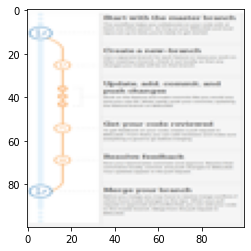

In [110]:
plt.imshow(im)

In [117]:
im1 = np.asarray(im,dtype=float)

In [118]:
tmp = im1.flatten()

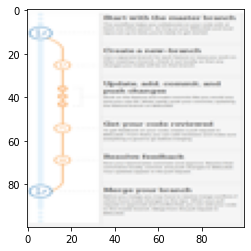

In [123]:
plt.imshow(tmp.reshape(px_size, px_size, 3).astype(np.uint8))

In [63]:
(im - tmp.reshape(px_size, px_size, 3)).shape

ValueError: operands could not be broadcast together with shapes (30000,) (100,100,3) 